In [1]:
import copy
import importlib
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import sys

sys.path.append(os.path.join(os.getenv("HOME"), "gpuaffman_networks/"))
from genetics import graph_crossover
import general_network_visualization

In [2]:
N = 20
k_max = 5
functions = np.random.binomial(1, 0.5, (N, 1 << k_max))
connections = np.random.randint(0, N, (N, k_max))
used_connections = np.random.binomial(1, 0.6, (N, k_max))
con_dict_in, con_dict_out = graph_crossover.connection_array_to_dict(connections, used_connections)

In [3]:
import importlib
importlib.reload(graph_crossover)
starting_nodes = np.random.randint(0, N, 2)
subgraph_size = 8
subgraph, cut_wires_in, cut_wires_out = graph_crossover.find_subraph(con_dict_in, con_dict_out, subgraph_size, starting_nodes)

In [4]:
full_g = general_network_visualization.influence_graph_from_ragged_spec(functions, connections, used_connections)

In [12]:
def plot_network_directed_cut(graph, subgraph, all_cut_wires, pos, ax):
    labels = {}
    node_colors = ["C1" if node in subgraph else "C0" for node in graph.nodes]
    edge_colors = []
    for edge in graph.edges:
        if edge[0] in subgraph and edge[1] in subgraph:
            edge_colors.append("C1")
        elif edge in all_cut_wires:
            edge_colors.append("C2")
        else:
            edge_colors.append("C0")
    for node in graph.nodes():
        labels[node]=node
    nx.draw_networkx_nodes(graph, pos=pos, ax=ax, node_color=node_colors)
    nx.draw_networkx_edges(graph, pos=pos, arrowstyle="->", ax=ax, arrows=True, edge_color=edge_colors)

    nx.draw_networkx_labels(graph, pos, labels, ax=ax)
    sm = plt.cm.ScalarMappable(cmap=plt.cm.Greys, norm=plt.Normalize(vmin=0, vmax=1))
    sm._A = []
    plt.colorbar(sm)

/var/folders/mq/fms8l94x0db50dyyzjvjh6_80000gn/T/ipykernel_29535/3689690026.py:21: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


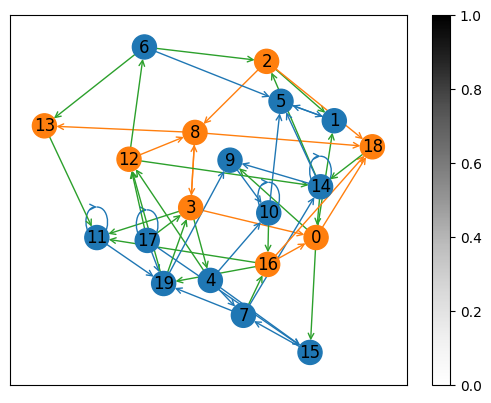

In [5]:

fig, axs = plt.subplots()
pos = nx.kamada_kawai_layout(full_g)
plot_network_directed_cut(full_g, subgraph, cut_wires_in + cut_wires_out, pos, axs)

In [2]:
graph_con_1 = np.array([[1 ,2], [0, 3], [4, 0], [1, 2], [5, 3], [4, 6], [4, 5]])
graph_used_con_1 = np.array([[True, True], [True, True], [True, True], [True, True], [True, True], [True, True], [True, True]])

In [3]:
graph_con_2 = np.array([[1 ,5], [4, 3], [4, 1], [4, 2], [5, 6], [1, 6], [4, 2]])
graph_used_con_2 = np.array([[True, True], [True, True], [True, True], [True, True], [True, True], [True, True], [True, True]])

In [4]:
N_breed_test = graph_con_1.shape[0]

In [5]:
special_nodes = [0, 1, 2]
first_node_labels = np.arange(start=0, stop=N_breed_test, step=1)
second_node_labels = np.arange(start=N_breed_test, stop=2 * N_breed_test, step=1)
second_node_labels[:len(special_nodes)] = special_nodes

In [6]:
first_in, first_out = graph_crossover.connection_array_to_dict(graph_con_1, graph_used_con_1, first_node_labels)
second_in, second_out = graph_crossover.connection_array_to_dict(graph_con_2, graph_used_con_2, second_node_labels)
size_first = 4
size_second = N_breed_test-size_first
first_subgraph, first_cut_wires_in, first_cut_wires_out, \
        second_subgraph, second_cut_wires_in, second_cut_wires_out = graph_crossover.split_parents(first_node_labels, first_in, first_out, second_node_labels, second_in, second_out, size_first, size_second, special_nodes)

In [21]:
importlib.reload(general_network_visualization)
g1 = general_network_visualization.graph_from_ragged_spec(graph_con_1, graph_used_con_1, node_labels=first_node_labels)
pos_1 = nx.kamada_kawai_layout(g1)
g2 = general_network_visualization.graph_from_ragged_spec(graph_con_2, graph_used_con_2, node_labels=second_node_labels)
pos_2 = nx.kamada_kawai_layout(g2)


/var/folders/mq/fms8l94x0db50dyyzjvjh6_80000gn/T/ipykernel_43165/1986062815.py:20: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


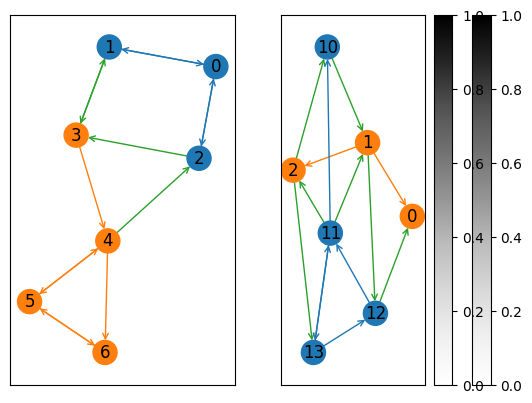

In [22]:


fig, axs = plt.subplots(ncols=2)
plot_network_directed_cut(g1, first_subgraph, first_cut_wires_in + first_cut_wires_out, pos_1, axs[0])
plot_network_directed_cut(g2, second_subgraph, second_cut_wires_in + second_cut_wires_out, pos_2, axs[1])

In [ ]:
importlib.reload(graph_crossover)
new_wires = graph_crossover.mend_cut_wires(first_subgraph, first_cut_wires_in, first_cut_wires_out, second_subgraph, second_cut_wires_in, second_cut_wires_out)

In [24]:
g1_sub = copy.deepcopy(g1)
g1_to_delete = []
for node in g1_sub.nodes:
    if not node in first_subgraph:
        g1_to_delete.append(node)
g1_sub.remove_nodes_from(g1_to_delete)

In [25]:
g2_sub = copy.deepcopy(g2)
g2_to_delete = []
for node in g2_sub.nodes:
    if not node in second_subgraph:
        g2_to_delete.append(node)
g2_sub.remove_nodes_from(g2_to_delete)

In [26]:
def plot_crossover_org(total_graph, subgraph_1, wires_1, wires_2, pos, ax):
    labels = {}
    node_colors = []
    for node in total_graph.nodes:
        if node in subgraph_1:
            node_colors.append("C0")
        else:
            node_colors.append("C1")
    edge_colors = []
    for edge in total_graph.edges:
        if edge in wires_1:
            edge_colors.append("C0")
        elif edge in wires_2:
            edge_colors.append("C1")
        else:
            edge_colors.append("C2")
    for node in total_graph.nodes():
        labels[node]=node
    nx.draw_networkx_nodes(total_graph, pos=pos, ax=ax, node_color=node_colors)
    nx.draw_networkx_edges(total_graph, pos=pos, arrowstyle="->", ax=ax, arrows=True, edge_color=edge_colors)

    nx.draw_networkx_labels(total_graph, pos, labels, ax=ax)
    sm = plt.cm.ScalarMappable(cmap=plt.cm.Greys, norm=plt.Normalize(vmin=0, vmax=1))
    sm._A = []
    plt.colorbar(sm)

In [27]:
g_total = nx.DiGraph()

g_total.add_nodes_from(list(g1_sub.nodes) + list(g2_sub.nodes))
g_total.add_edges_from(list(g1_sub.edges) + list(g2_sub.edges) + new_wires)
pos = nx.kamada_kawai_layout(g_total)

/var/folders/mq/fms8l94x0db50dyyzjvjh6_80000gn/T/ipykernel_43165/2408715728.py:25: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm)


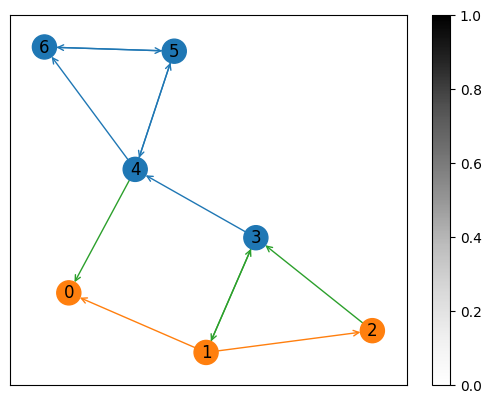

In [28]:
fig, axs = plt.subplots()
plot_crossover_org(g_total, first_subgraph, g1_sub.edges, g2_sub.edges, pos, axs)